# 使用氘核来研究核核碰撞的末态是否携带初态核结构的信息
## d核有Hulthén Wavefunction (HWF)、Deuteron Wavefunctions (DWF)，两种波函数形式

### Deuteron Wavefunctions (DWF)波函数由以下形式构成

### $$\begin{aligned}
P(r,\theta)&=\rho(r,\theta) \,\, r^2\sin\theta dr d\theta d\phi\ \\
&=|\psi(r,\theta)|^{2}\,\,r^2\sin\theta dr d\theta d\phi \\
& =(\frac{u(r)}{r}Y_{101}^{1}+\frac{w(r)}{r}Y_{121}^{1})^{*} (\frac{u(r)}{r}Y_{101}^{1}+\frac{w(r)}{r}Y_{121}^{1})\,\, r^2\sin\theta dr d\theta d\phi \\
&=\frac{u^{2}(r)}{r^{2}}(Y_{101}^{1})^{*}Y_{101}^{1}\,\,r^2\sin\theta dr d\theta d\phi \\
&+\frac{u(r)w(r)}{r^{2}}(Y_{101}^{1})^{*}Y_{121}^{1}\,\,r^2\sin\theta dr d\theta d\phi \\
&+\frac{w(r)u(r)}{r^{2}}(Y_{121}^{1})^{*}Y_{101}^{1}\,\,r^2\sin\theta dr d\theta d\phi \\
&+\frac{w^{2}(r)}{r^{2}}(Y_{121}^{1})^{*}Y_{121}^{1} \,\,r^2\sin\theta dr d\theta d\phi \\
&=\frac{u^{2}(r)}{4\pi r^{2}}\,\,r^2\sin\theta dr d\theta d\phi \\
&+\frac{u(r)w(r)}{4\pi r^{2}}\sqrt{\frac{1}{2}}(3\cos^{2}\theta-1)\,\,r^2\sin\theta dr d\theta d\phi \\
&+\frac{w^2(r)}{4\pi r^2}\left[\frac{9}{8}\sin^4\theta+\frac{9}{4}\sin^2\theta\cos^2\theta +\frac{1}{8}(3\cos^2\theta-1)^2 \right]\,\, r^2\sin\theta dr d\theta d\phi \\
&= \frac{1}{4 \pi r^{2}} \left[ u^{2}(r) + \frac{u(r) w(r)}{\sqrt{2}} \left( 3 \cos^{2} \theta - 1 \right)
  + \frac{w^{2}(r)}{4} \left( 5 - 3 \cos^{2} \theta \right) \right]\,\, r^2\sin\theta dr d\theta d\phi
\end{aligned}$$

### trento中Hulthén Wavefunction (TRENTo/HWF)

### $$\Psi_{d}\left(r\right) = \left(\frac{\alpha\beta(\alpha+\beta)}{2\pi(\alpha-\beta)^{2}}\right)^{1/2} \frac{\left(e^{-\alpha r}-e^{-\beta r}\right)}{r}$$

### $$\alpha = 0.228 \, \text{fm}^{-1} \text{ and } \beta = 1.18 \, \text{fm}^{-1}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.integrate import quad
import os

In [2]:
import mplhep as hep
hep.style.use('ATLAS')

# 采样的结果

In [3]:
d_DWF = np.loadtxt("/home/mengzhu/mywork/d_Au_work/data/DWF_d_r_theta_phi_10000000.dat")

In [4]:
#抽样出来的r,theta,phi
r_DWF = d_DWF[0]
theta_DWF = d_DWF[1]
phi_DWF = d_DWF[2]


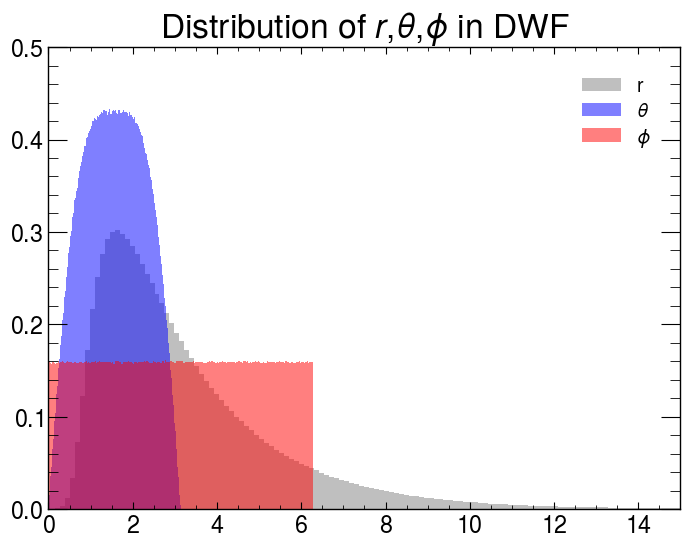

In [5]:
_ = plt.hist(r_DWF, bins=200, density=True, color='grey', alpha=0.5,label='r')
_ = plt.hist(theta_DWF, bins=200, density=True, color='blue', alpha=0.5,label=r'$\theta$')
_ = plt.hist(phi_DWF, bins=200, density=True, color='red', alpha=0.5,label=r'$\phi$')
plt.xlim(0,15)
plt.title(r'Distribution of $r$,$\theta$,$\phi$ in DWF')
plt.legend()

In [6]:
#导入trento产生的HWF坐标信息
# d_HWF = np.loadtxt("/home/mengzhu/mywork/d_Au_work/data/HWF_d_xyz_10000000.dat")

In [7]:
#把直角坐标改为球坐标
def cartesian_to_spherical(data):
    n=int(len(data)/2)

    x = np.zeros(n, dtype=np.float32)
    y = np.zeros(n, dtype=np.float32)
    z = np.zeros(n, dtype=np.float32)
    i = 0
    j = 0
    for j in range(n):

        x[j] = data[i][0]-data[i+1][0]
        y[j] = data[i][1]-data[i+1][1]
        z[j] = data[i][2]-data[i+1][2]
        i = i +2
        j = j +1
        
    r_HWF = np.sqrt(x**2 + y**2 + z**2)

    cos_theta = z/r_HWF
    sin_theta = np.sqrt(1 - cos_theta**2)
    tan_theta = sin_theta/cos_theta
    
    tan_phi = y/x
    
    phi_HWF = np.arctan2(y,x)
    theta_HWF = np.arctan2(sin_theta,cos_theta)
    
    return r_HWF, theta_HWF, phi_HWF

In [8]:
# d_HWF = cartesian_to_spherical(data=d_HWF)

In [9]:
# np.savetxt("/home/mengzhu/mywork/d_Au_work/data/HWF_d_r_theta_phi_10000000.dat",d_HWF)

In [10]:
d_HWF = np.loadtxt("/home/mengzhu/mywork/d_Au_work/data/HWF_d_r_theta_phi_10000000.dat")

In [11]:
r_HWF = d_HWF[0]
theta_HWF = d_HWF[1]
phi_HWF = d_HWF[2]

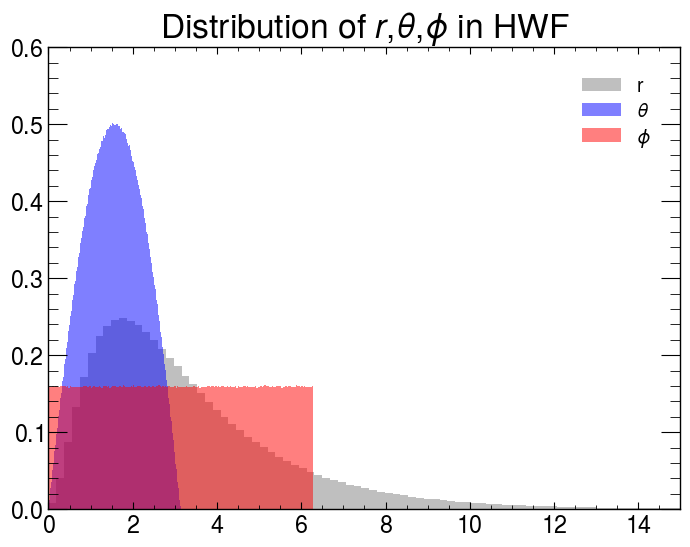

In [12]:
_ = plt.hist(r_HWF, bins=200, density=True, color='grey', alpha=0.5,label='r')
_ = plt.hist(theta_HWF, bins=200, density=True, color='blue', alpha=0.5,label=r'$\theta$')
_ = plt.hist(phi_HWF+np.pi, bins=200, density=True, color='red', alpha=0.5,label=r'$\phi$')
plt.xlim(0,15)
plt.title(r'Distribution of $r$,$\theta$,$\phi$ in HWF')
plt.legend()

In [13]:
d_DWF_noineraction = np.loadtxt("/home/mengzhu/mywork/d_Au_work/data/DWF_d_r_theta_phi_10000000_no_interaction.dat")

In [14]:
#抽样出来的r,theta,phi
r_DWF_no = d_DWF_noineraction[0]
theta_DWF_no = d_DWF_noineraction[1]
phi_DWF_no = d_DWF_noineraction[2]


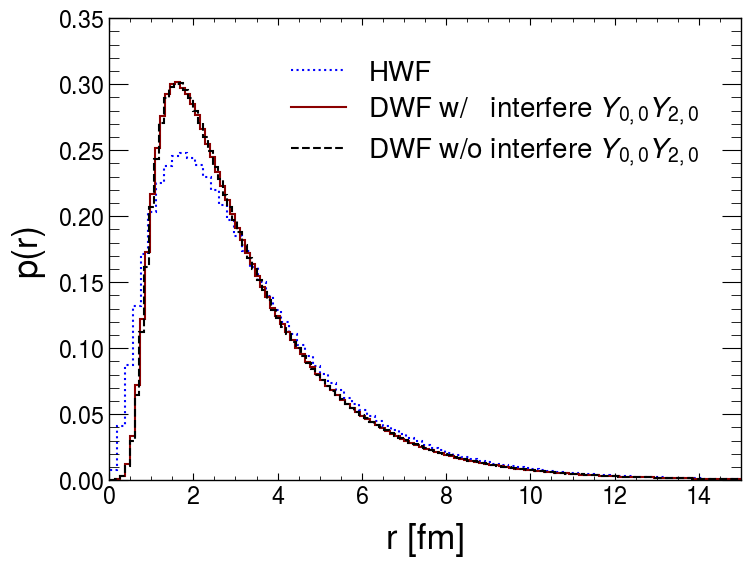

In [22]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# 绘制 hist（但不显示图例）
plt.hist(r_HWF, bins=200, density=True, color='blue', histtype='step', linestyle=':', linewidth=1.5, label='_nolegend_')
plt.hist(r_DWF, bins=200, density=True, color='darkred', histtype='step', linestyle='-', linewidth=1.5, label='_nolegend_')
plt.hist(r_DWF_no, bins=200, density=True, color='black', histtype='step', linestyle='--', linewidth=1.5, label='_nolegend_')

# 手动创建图例（用 Line2D 代替默认的矩形）
legend_elements = [
    Line2D([0], [0], color='blue', linestyle=':', lw=1.5, label='HWF'),
    Line2D([0], [0], color='darkred', linestyle='-', lw=1.5, label='DWF w/   interfere $Y_{0,0}Y_{2,0}$'),
    Line2D([0], [0], color='black', linestyle='--', lw=1.5, label=r'DWF w/o interfere $Y_{0,0}Y_{2,0}$'),
]

plt.legend(handles=legend_elements, fontsize=20)  # 应用自定义图例
plt.xlim(0, 15)
plt.xlabel('r [fm]', ha='center', fontsize=25)
plt.ylabel('p(r)', ha='center', fontsize=25)
plt.savefig("/home/mengzhu/mywork/d_Au_work/fig/r_dis_between_HWF_and_DWF_DWF_NO.pdf", bbox_inches="tight")

plt.show()

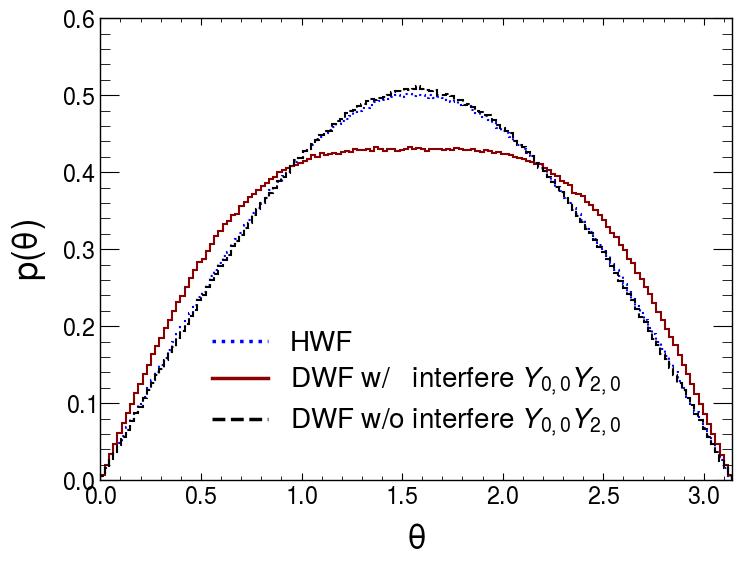

In [24]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# 绘制 hist（但不显示图例）
plt.hist(theta_HWF, bins=150, density=True, color='blue', histtype='step', linestyle=':', linewidth=1.5, label='_nolegend_')
plt.hist(theta_DWF, bins=150, density=True, color='darkred', histtype='step', linestyle='-', linewidth=1.5, label='_nolegend_')
plt.hist(theta_DWF_no, bins=150, density=True, color='black', histtype='step', linestyle='--', linewidth=1.5, label='_nolegend_')

# 手动创建图例（用 Line2D 代替默认的矩形）
legend_elements = [
    Line2D([0], [0], color='blue', linestyle=':', lw=2.5, label='HWF'),
    Line2D([0], [0], color='darkred', linestyle='-', lw=2.5, label='DWF w/   interfere $Y_{0,0}Y_{2,0}$'),
    Line2D([0], [0], color='black', linestyle='--', lw=2.5, label=r'DWF w/o interfere $Y_{0,0}Y_{2,0}$'),
]

plt.legend(handles=legend_elements, fontsize=20,loc='best')  # 应用自定义图例
plt.xlim(0, np.pi)
plt.ylim(0, 0.6)

plt.xlabel(r'$\rm \theta$', ha='center', fontsize=25)
plt.ylabel(r'p($\rm \theta$)', ha='center', fontsize=25)
plt.savefig("/home/mengzhu/mywork/d_Au_work/fig/theta_dis_between_HWF_and_DWF_DWF_NO.pdf", bbox_inches="tight")

# plt.legend(fontsize=20)
plt.show()

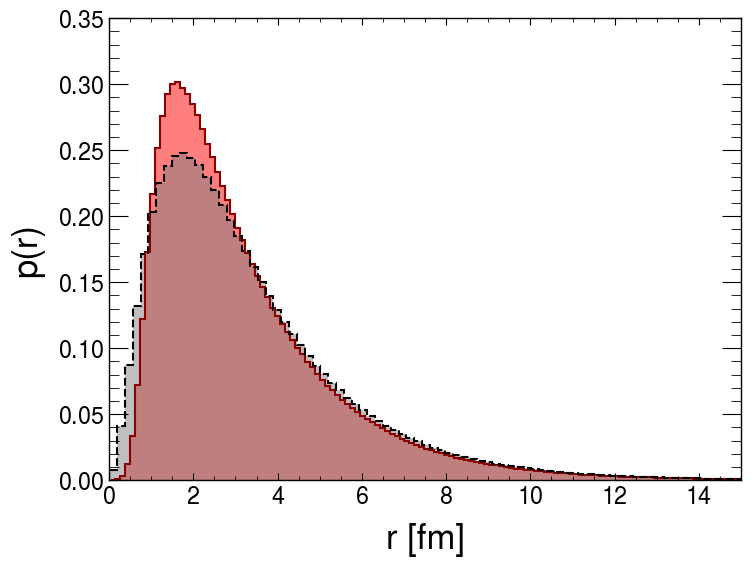

In [83]:
fig = plt.figure(figsize=(8, 6))  # 创建一个8x6英寸的图形对象

# 1. 绘制半透明柱状图（填充色）
_ = plt.hist(r_DWF, bins=200, density=True, color='red', alpha=0.5, edgecolor='none', label='DWF (Edge Solid Line)')
_ = plt.hist(r_HWF, bins=200, density=True, color='grey', alpha=0.5, edgecolor='none', label='HWF (Edge Dashed Line)')

# 2. 绘制顶部线（用step样式，但不添加到图例）
_ = plt.hist(r_DWF, bins=200, density=True, color='darkred', 
             histtype='step', linestyle='-', linewidth=1.5, label='_nolegend_')
_ = plt.hist(r_HWF, bins=200, density=True, color='black', 
             histtype='step', linestyle='--', linewidth=1.5, label='_nolegend_')
plt.xlim(0, 15)
plt.xlabel('r [fm]', ha='center', fontsize=25)
plt.ylabel('p(r)', ha='center', fontsize=25)

# plt.savefig("/home/mengzhu/mywork/d_Au_work/fig/theta_dis_between_HWF_and_DWF_lines.pdf", bbox_inches="tight")
plt.show()

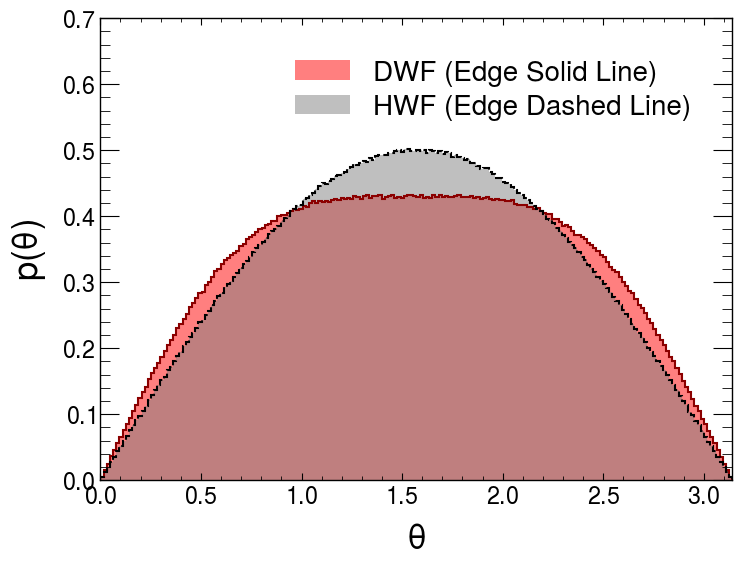

In [84]:
fig = plt.figure(figsize=(8, 6))  # 创建一个8x6英寸的图形对象

# 1. 绘制半透明柱状图（填充色）
_ = plt.hist(theta_DWF, bins=200, density=True, color='red', alpha=0.5, edgecolor='none', label='DWF (Edge Solid Line)')
_ = plt.hist(theta_HWF, bins=200, density=True, color='grey', alpha=0.5, edgecolor='none', label='HWF (Edge Dashed Line)')

# 2. 绘制顶部线（用step样式，但不添加到图例）
_ = plt.hist(theta_DWF, bins=200, density=True, color='darkred', 
             histtype='step', linestyle='-', linewidth=1.5, label='_nolegend_')
_ = plt.hist(theta_HWF, bins=200, density=True, color='black', 
             histtype='step', linestyle='--', linewidth=1.5, label='_nolegend_')

plt.xlim(0, np.pi)
plt.ylim(0, 0.7)

plt.xlabel(r'$\rm \theta$', ha='center', fontsize=25)
plt.ylabel(r'p($\rm \theta$)', ha='center', fontsize=25)
plt.legend(fontsize=20)

# plt.savefig("/home/mengzhu/mywork/d_Au_work/fig/theta_dis_between_HWF_and_DWF_lines.pdf", bbox_inches="tight")
plt.show()

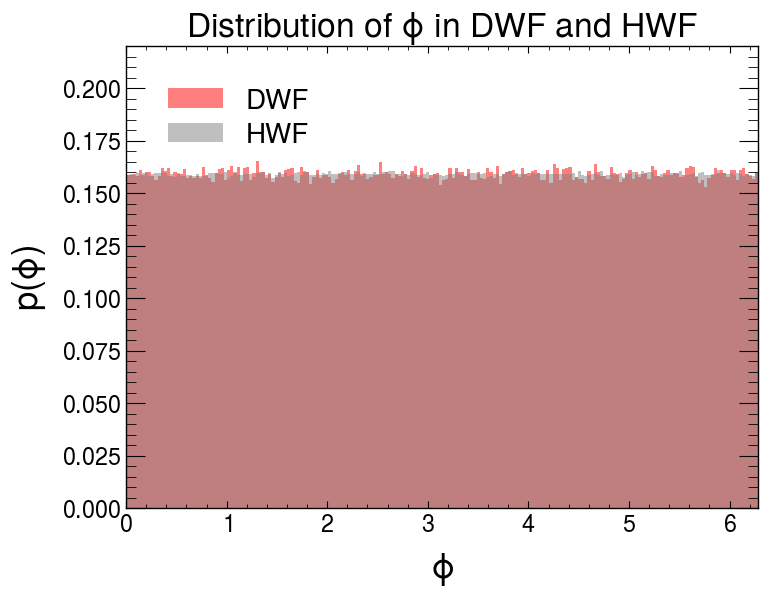

In [13]:
fig = plt.figure(figsize=(8, 6))  # 创建一个8x6英寸的图形对象
_ = plt.hist(phi_DWF, bins=200, density=True, color='red', alpha=0.5,label='DWF')
_ = plt.hist(phi_HWF+np.pi, bins=200, density=True, color='grey', alpha=0.5,label='HWF')
plt.xlim(0,np.pi*2)
plt.xlabel(r'$\rm \phi$',ha='center',fontsize=25)
plt.ylabel(r'p($\rm \phi$)',ha='center',fontsize=25)
plt.title(r'Distribution of $\rm \phi$ in DWF and HWF')
plt.ylim(0,0.22)
plt.legend(fontsize=20)


# plt.savefig("/home/mengzhu/mywork/d_Au_work/fig/phi_dis_between_HWF_and_DWF.pdf", bbox_inches="tight")

# trento 的结果

In [14]:
#导入DWF采样后trento中的氘核与金核碰撞的结果，此结果包含ncoll项

trento2d_DWF = np.loadtxt("/home/mengzhu/mywork/d_Au_work/data/trento2d_DWF_d_Au_ncoll_10000000.dat")
trento2d_HWF = np.loadtxt("/home/mengzhu/mywork/d_Au_work/data/trento2d_HWF_d_Au_ncoll_10000000.dat")



In [28]:
# TRENTo2d_InitialDataVisualizer_without_errorbar 

import matplotlib.ticker as ticker
class TRENTo2d_InitialDataVisualizer_without_errorbar:
    def __init__(self, data_DWF, data_HWF):
        """
        初始化类，传入数据
        data_DWF: 第一组数据
        data_HWF: 第二组数据
        """
        self.data_DWF = data_DWF
        self.data_HWF = data_HWF
        self.column_labels = {
            1: r"$\rm b$",
            2: r"$\rm N_{part}$",
            3: r"$\rm N_{coll}$",
            4: r"$\rm Total \quad Entropy$",
            5: r"$\rm <\epsilon_2>$",
            6: r"$\rm <\epsilon_3>$",
            7: r"$\rm <\epsilon_4>$",
            8: r"$\rm <\epsilon_5>$"
        }
        self.column_labels_delta = {
            1: r"$\rm b$",
            2: r"$\rm N_{part}$",
            3: r"$\rm N_{coll}$",
            4: r"$\rm Total \quad Entropy$",
            5: r"$\rm \sqrt{<\epsilon_2^2>-<\epsilon_2>^2}$",
            6: r"$\rm \sqrt{<\epsilon_3^2>-<\epsilon_3>^2}$",
            7: r"$\rm \sqrt{<\epsilon_4^2>-<\epsilon_4>^2}$",
            8: r"$\rm \sqrt{<\epsilon_5^2>-<\epsilon_5>^2}$"
        }
        self.column_labels_delta2 = {
            1: r"$\rm b$",
            2: r"$\rm N_{part}$",
            3: r"$\rm N_{coll}$",
            4: r"$\rm Total \quad Entropy$",
            5: r"$\rm <\epsilon_2^2>-<\epsilon_2>^2$",
            6: r"$\rm <\epsilon_3^2>-<\epsilon_3>^2$",
            7: r"$\rm <\epsilon_4^2>-<\epsilon_4>^2$",
            8: r"$\rm <\epsilon_5^2>-<\epsilon_5>^2$"
        }
        self.column_labels_sqr = {
            1: r"$\rm b$",
            2: r"$\rm N_{part}$",
            3: r"$\rm N_{coll}$",
            4: r"$\rm Total \quad Entropy$",
            5: r"$\rm <\epsilon_2^2>$",
            6: r"$\rm <\epsilon_3^2>$",
            7: r"$\rm <\epsilon_4^2>$",
            8: r"$\rm <\epsilon_5^2>$"
        }
        self.column_labels_sqr_sqrt = {
            1: r"$\rm b$",
            2: r"$\rm N_{part}$",
            3: r"$\rm N_{coll}$",
            4: r"$\rm Total \quad Entropy$",
            5: r"$\rm \sqrt{<\epsilon_2^2>}$",
            6: r"$\rm \sqrt{<\epsilon_3^2>}$",
            7: r"$\rm \sqrt{<\epsilon_4^2>}$",
            8: r"$\rm \sqrt{<\epsilon_5^2>}$"
        }

    def calc_column_relationship(self, data, col_x, col_y, bins=100):
        """
        计算两列数据之间的关系，返回区间中心，均值，均方差及误差
        """
        x_data = data[:, col_x]
        y_data = data[:, col_y]

        min_x = np.min(x_data)
        max_x = np.max(x_data)
        step = (max_x - min_x) / bins

        bin_centers = []
        y_means = []
        sqr_y_means = []
        y_errors = []
        sqr_y_errors = []
        
        for i in range(bins):
            lower_bound = min_x + i * step
            upper_bound = min_x + (i + 1) * step
            indices = (x_data >= lower_bound) & (x_data < upper_bound)

            if np.sum(indices) > 0:
                avg_y = np.mean(y_data[indices])
                avg_sqr_y = np.mean(y_data[indices]**2)
                
                std_y = np.std(y_data[indices])
                std_sqr_y = np.std(y_data[indices]**2)
                
                error_y = std_y / np.sqrt(np.sum(indices))
                error_sqr_y = std_sqr_y / np.sqrt(np.sum(indices))
                
                bin_centers.append((lower_bound + upper_bound) / 2)
                y_means.append(avg_y)
                sqr_y_means.append(avg_sqr_y)
                y_errors.append(error_y)
                sqr_y_errors.append(error_sqr_y)
                
        bin_centers = np.array(bin_centers)
        y_means = np.array(y_means)
        sqr_y_means = np.array(sqr_y_means)
        y_errors = np.array(y_errors)
        sqr_y_errors = np.array(sqr_y_errors)
        
        return bin_centers, y_means, sqr_y_means, y_errors, sqr_y_errors

    def plot_column_relationship(self, col_x, col_y, bins=100,loc='best'):
        """
        绘制单张图，比较两列数据之间的关系
        """
        xlabel = self.column_labels.get(col_x, f"Column {col_x}")
        ylabel = self.column_labels.get(col_y, f"Column {col_y}")

        bin_centers_DWF, y_means_DWF, y_means_sqr_DWF, yerr_DWF, yerr_sqr_DWF = self.calc_column_relationship(
            data=self.data_DWF, col_x=col_x, col_y=col_y, bins=bins)
        bin_centers_HWF, y_means_HWF, y_means_sqr_HWF, yerr_HWF, yerr_sqr_HWF = self.calc_column_relationship(
            data=self.data_HWF, col_x=col_x, col_y=col_y, bins=bins)

        plt.plot(bin_centers_DWF, y_means_DWF, linestyle='-', color='red', label="DWF")
        plt.plot(bin_centers_HWF, y_means_HWF, linestyle='--', color='grey', label="HWF")
        
        plt.xlabel(xlabel, ha='center', fontsize=25)
        plt.ylabel(ylabel, ha='center', fontsize=25)
        plt.legend(loc=loc,fontsize=20)
    
    def plot_column_relationship_delta(self, col_x, col_y, bins=100,loc='best'):
        """
        绘制单张图，比较两列数据之间的关系
        """
        xlabel = self.column_labels_delta.get(col_x, f"Column {col_x}")
        ylabel = self.column_labels_delta.get(col_y, f"Column {col_y}")

        bin_centers_DWF, y_means_DWF, y_means_sqr_DWF, yerr_DWF, yerr_sqr_DWF = self.calc_column_relationship(
            data=self.data_DWF, col_x=col_x, col_y=col_y, bins=bins)
        bin_centers_HWF, y_means_HWF, y_means_sqr_HWF, yerr_HWF, yerr_sqr_HWF = self.calc_column_relationship(
            data=self.data_HWF, col_x=col_x, col_y=col_y, bins=bins)
        
        delta_y_DWF = y_means_sqr_DWF - y_means_DWF**2
        delta_y_HWF = y_means_sqr_HWF - y_means_HWF**2
        
        plt.plot(bin_centers_DWF, np.sqrt(delta_y_DWF), linestyle='-', color='red', label="DWF")
        plt.plot(bin_centers_HWF, np.sqrt(delta_y_HWF), linestyle='--', color='grey', label="HWF")
        
        plt.xlabel(xlabel, ha='center', fontsize=25)
        plt.ylabel(ylabel, ha='center', fontsize=25)
        ax.ticklabel_format(style='scientific', axis='y', scilimits=(-2, 2))
        self._apply_yaxis_format(ax, exponent=-2)  # 调用统一的Y轴格式化函数
        plt.legend(loc=loc,fontsize=20)
    
    def plot_column_relationship_delta2(self, col_x, col_y, bins=100,loc='best'):
        """
        绘制单张图，比较两列数据之间的关系
        """
        xlabel = self.column_labels_delta2.get(col_x, f"Column {col_x}")
        ylabel = self.column_labels_delta2.get(col_y, f"Column {col_y}")

        bin_centers_DWF, y_means_DWF, y_means_sqr_DWF, yerr_DWF, yerr_sqr_DWF = self.calc_column_relationship(
            data=self.data_DWF, col_x=col_x, col_y=col_y, bins=bins)
        bin_centers_HWF, y_means_HWF, y_means_sqr_HWF, yerr_HWF, yerr_sqr_HWF = self.calc_column_relationship(
            data=self.data_HWF, col_x=col_x, col_y=col_y, bins=bins)
        
        delta_y_DWF = y_means_sqr_DWF - y_means_DWF**2
        delta_y_HWF = y_means_sqr_HWF - y_means_HWF**2
        

        plt.plot(bin_centers_DWF, delta_y_DWF, linestyle='-', color='red', label="DWF")
        plt.plot(bin_centers_HWF, delta_y_HWF, linestyle='--', color='grey', label="HWF")
        
        plt.xlabel(xlabel, ha='center', fontsize=25)
        plt.ylabel(ylabel, ha='center', fontsize=25)
        plt.legend(loc=loc,fontsize=20)
    
    def plot_column_relationship_sqr(self, col_x, col_y, bins=100,loc='best'):
        """
        绘制单张图，比较两列数据之间的关系
        """
        xlabel = self.column_labels_sqr.get(col_x, f"Column {col_x}")
        ylabel = self.column_labels_sqr.get(col_y, f"Column {col_y}")

        bin_centers_DWF, y_means_DWF, y_means_sqr_DWF, yerr_DWF, yerr_sqr_DWF = self.calc_column_relationship(
            data=self.data_DWF, col_x=col_x, col_y=col_y, bins=bins)
        bin_centers_HWF, y_means_HWF, y_means_sqr_HWF, yerr_HWF, yerr_sqr_HWF = self.calc_column_relationship(
            data=self.data_HWF, col_x=col_x, col_y=col_y, bins=bins)

        plt.plot(bin_centers_DWF, y_means_sqr_DWF, linestyle='-', color='red', label="DWF")
        plt.plot(bin_centers_HWF, y_means_sqr_HWF, linestyle='--', color='grey', label="HWF")
        
        plt.xlabel(xlabel, ha='center', fontsize=25)
        plt.ylabel(ylabel, ha='center', fontsize=25)
        plt.legend(loc=loc,fontsize=20)
        
    def plot_multiple_relationships(self, cols_x, cols_y, bins=100, save_fig=False,loc='best'):
        """
        在一个图中绘制多张图表，cols_x 和 cols_y 为要对比的列索引的列表
        """
        fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 创建2x2的子图

        for i, ax in enumerate(axes.flat):
            col_x = cols_x[i]
            col_y = cols_y[i]

            xlabel = self.column_labels.get(col_x, f"Column {col_x}")
            ylabel = self.column_labels.get(col_y, f"Column {col_y}")

            bin_centers_DWF, y_means_DWF, y_means_sqr_DWF, yerr_DWF, yerr_sqr_DWF  = self.calc_column_relationship(
                data=self.data_DWF, col_x=col_x, col_y=col_y, bins=bins)
            bin_centers_HWF, y_means_HWF, y_means_sqr_HWF, yerr_HWF, yerr_sqr_HWF = self.calc_column_relationship(
                data=self.data_HWF, col_x=col_x, col_y=col_y, bins=bins)

            ax.plot(bin_centers_DWF, y_means_DWF, linestyle='-', color='red', label="DWF")
            ax.plot(bin_centers_HWF, y_means_HWF, linestyle='--', color='grey', label="HWF")
            
            ax.set_xlabel(xlabel, ha='center', fontsize=25)
            ax.set_ylabel(ylabel, ha='center', fontsize=25)
            ax.legend(loc=loc,fontsize=20)
            
        plt.tight_layout()
        
        if save_fig:
            # 生成保存文件名
            save_ylabel = ylabel.replace("$", "").replace("\\", "").replace("5", "n")
            save_xlabel = xlabel.replace("$", "").replace("\\", "")
            save_path = f"/home/mengzhu/mywork/d_Au_work/fig/{save_ylabel}_vs_{save_xlabel}.pdf"
            os.makedirs("/home/mengzhu/mywork/d_Au_work/fig", exist_ok=True)  # 确保目录存在
            plt.savefig(save_path, bbox_inches="tight")
            print(f"Figure saved to {save_path}") 
#         plt.show()
        
    def plot_multiple_relationships_delta(self, cols_x, cols_y, bins=100, save_fig=False,loc='best'):
        """
        在一个图中绘制多张图表，cols_x 和 cols_y 为要对比的列索引的列表
        """
        fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 创建2x2的子图

        for i, ax in enumerate(axes.flat):
            col_x = cols_x[i]
            col_y = cols_y[i]

            xlabel = self.column_labels_delta.get(col_x, f"Column {col_x}")
            ylabel = self.column_labels_delta.get(col_y, f"Column {col_y}")

            bin_centers_DWF, y_means_DWF, y_means_sqr_DWF, yerr_DWF, yerr_sqr_DWF = self.calc_column_relationship(
                data=self.data_DWF, col_x=col_x, col_y=col_y, bins=bins)
            bin_centers_HWF, y_means_HWF, y_means_sqr_HWF, yerr_HWF, yerr_sqr_HWF = self.calc_column_relationship(
                data=self.data_HWF, col_x=col_x, col_y=col_y, bins=bins)
            
            delta_y_DWF = y_means_sqr_DWF - y_means_DWF**2
            delta_y_HWF = y_means_sqr_HWF - y_means_HWF**2
    
            ax.plot(bin_centers_DWF, np.sqrt(delta_y_DWF), linestyle='-', color='red', label="DWF")
            ax.plot(bin_centers_HWF, np.sqrt(delta_y_HWF), linestyle='--', color='grey', label="HWF")
            
            ax.set_xlabel(xlabel, ha='center', fontsize=25)
            ax.set_ylabel(ylabel, ha='center', fontsize=25)
            ax.legend(loc=loc,fontsize=20)

        plt.tight_layout()
        
        if save_fig:
            # 生成保存文件名
            save_ylabel = ylabel.replace("$", "").replace("\\", "").replace("5", "n")
            save_xlabel = xlabel.replace("$", "").replace("\\", "")
            save_path = f"/home/mengzhu/mywork/d_Au_work/fig/{save_ylabel}_vs_{save_xlabel}.pdf"
            os.makedirs("/home/mengzhu/mywork/d_Au_work/fig", exist_ok=True)  # 确保目录存在
            plt.savefig(save_path, bbox_inches="tight")
            print(f"Figure saved to {save_path}")       
#         plt.show()
    
    def plot_multiple_relationships_delta2(self, cols_x, cols_y, bins=100, save_fig=False,loc='best'):
        """
        在一个图中绘制多张图表，cols_x 和 cols_y 为要对比的列索引的列表
        """
        fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 创建2x2的子图

        for i, ax in enumerate(axes.flat):
            col_x = cols_x[i]
            col_y = cols_y[i]

            xlabel = self.column_labels_delta2.get(col_x, f"Column {col_x}")
            ylabel = self.column_labels_delta2.get(col_y, f"Column {col_y}")

            bin_centers_DWF, y_means_DWF, y_means_sqr_DWF, yerr_DWF, yerr_sqr_DWF = self.calc_column_relationship(
                data=self.data_DWF, col_x=col_x, col_y=col_y, bins=bins)
            bin_centers_HWF, y_means_HWF, y_means_sqr_HWF, yerr_HWF, yerr_sqr_HWF = self.calc_column_relationship(
                data=self.data_HWF, col_x=col_x, col_y=col_y, bins=bins)
            
            delta_y_DWF = y_means_sqr_DWF - y_means_DWF**2
            delta_y_HWF = y_means_sqr_HWF - y_means_HWF**2
    
            ax.plot(bin_centers_DWF, delta_y_DWF, linestyle='-', color='red', label="DWF")
            ax.plot(bin_centers_HWF, delta_y_HWF, linestyle='--', color='grey', label="HWF")
            
            ax.set_xlabel(xlabel, ha='center', fontsize=25)
            ax.set_ylabel(ylabel, ha='center', fontsize=25)
            # 使用自定义的 FuncFormatter 设置纵坐标的刻度格式
            def format_func(value, tick_number):
                return f'{value * 100:.0f}'  # 将刻度乘以100以转换为10^-2格式

            ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

            # 添加额外的文本来显示乘法因子
            ax.annotate(r'$\times10^{-2}$', xy=(0.02, 1.02), xycoords='axes fraction', fontsize=18)
            ax.legend(loc=loc,fontsize=20)

        plt.tight_layout()
        
        if save_fig:
            # 生成保存文件名
            save_ylabel = ylabel.replace("$", "").replace("\\", "").replace("5", "n")
            save_xlabel = xlabel.replace("$", "").replace("\\", "")
            save_path = f"/home/mengzhu/mywork/d_Au_work/fig/{save_ylabel}_vs_{save_xlabel}.pdf"
            os.makedirs("/home/mengzhu/mywork/d_Au_work/fig", exist_ok=True)  # 确保目录存在
            plt.savefig(save_path, bbox_inches="tight")
            print(f"Figure saved to {save_path}")    
#         plt.show()
    
    def plot_multiple_relationships_sqr(self, cols_x, cols_y, bins=100, save_fig=False,loc='best'):
        """
        在一个图中绘制多张图表，cols_x 和 cols_y 为要对比的列索引的列表
        """
        fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 创建2x2的子图

        for i, ax in enumerate(axes.flat):
            col_x = cols_x[i]
            col_y = cols_y[i]

            xlabel = self.column_labels_sqr.get(col_x, f"Column {col_x}")
            ylabel = self.column_labels_sqr.get(col_y, f"Column {col_y}")

            bin_centers_DWF, y_means_DWF, y_means_sqr_DWF, yerr_DWF, yerr_sqr_DWF = self.calc_column_relationship(
                data=self.data_DWF, col_x=col_x, col_y=col_y, bins=bins)
            bin_centers_HWF, y_means_HWF, y_means_sqr_HWF, yerr_HWF, yerr_sqr_HWF = self.calc_column_relationship(
                data=self.data_HWF, col_x=col_x, col_y=col_y, bins=bins)
    
            ax.plot(bin_centers_DWF, y_means_sqr_DWF, linestyle='-', color='red', label="DWF")
            ax.plot(bin_centers_HWF, y_means_sqr_HWF, linestyle='--', color='grey', label="HWF")
            
            ax.set_xlabel(xlabel, ha='center', fontsize=25)
            ax.set_ylabel(ylabel, ha='center', fontsize=25)
            ax.legend(loc=loc,fontsize=20)

        plt.tight_layout()
        
        if save_fig:
            # 生成保存文件名
            save_ylabel = ylabel.replace("$", "").replace("\\", "").replace("5", "n")
            save_xlabel = xlabel.replace("$", "").replace("\\", "")
            save_path = f"/home/mengzhu/mywork/d_Au_work/fig/{save_ylabel}_vs_{save_xlabel}.pdf"
            os.makedirs("/home/mengzhu/mywork/d_Au_work/fig", exist_ok=True)  # 确保目录存在
            plt.savefig(save_path, bbox_inches="tight")
            print(f"Figure saved to {save_path}")    
#         plt.show()

    def plot_multiple_relationships_sqr_sqrt(self, cols_x, cols_y, bins=100, save_fig=False,loc='best'):
        """
        在一个图中绘制多张图表，cols_x 和 cols_y 为要对比的列索引的列表
        """
        fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 创建2x2的子图

        for i, ax in enumerate(axes.flat):
            col_x = cols_x[i]
            col_y = cols_y[i]

            xlabel = self.column_labels_sqr_sqrt.get(col_x, f"Column {col_x}")
            ylabel = self.column_labels_sqr_sqrt.get(col_y, f"Column {col_y}")

            bin_centers_DWF, y_means_DWF, y_means_sqr_DWF, yerr_DWF, yerr_sqr_DWF = self.calc_column_relationship(
                data=self.data_DWF, col_x=col_x, col_y=col_y, bins=bins)
            bin_centers_HWF, y_means_HWF, y_means_sqr_HWF, yerr_HWF, yerr_sqr_HWF = self.calc_column_relationship(
                data=self.data_HWF, col_x=col_x, col_y=col_y, bins=bins)
    
            ax.plot(bin_centers_DWF, np.sqrt(y_means_sqr_DWF), linestyle='-', color='red', label="DWF")
            ax.plot(bin_centers_HWF, np.sqrt(y_means_sqr_HWF), linestyle='--', color='grey', label="HWF")
            
            ax.set_xlabel(xlabel, ha='center', fontsize=25)
            ax.set_ylabel(ylabel, ha='center', fontsize=25)
            ax.legend(loc=loc,fontsize=20)

        plt.tight_layout()
        
        if save_fig:
            # 生成保存文件名
            save_ylabel = ylabel.replace("$", "").replace("\\", "").replace("5", "n")
            save_xlabel = xlabel.replace("$", "").replace("\\", "")
            save_path = f"/home/mengzhu/mywork/d_Au_work/fig/{save_ylabel}_vs_{save_xlabel}.pdf"
            os.makedirs("/home/mengzhu/mywork/d_Au_work/fig", exist_ok=True)  # 确保目录存在
            plt.savefig(save_path, bbox_inches="tight")
            print(f"Figure saved to {save_path}")    
#         plt.show()





# 使用示例
# 假设data_sam2d和data_trento2d已经定义
visualizer_without_errorbar = TRENTo2d_InitialDataVisualizer_without_errorbar(data_DWF=trento2d_DWF, data_HWF=trento2d_HWF)


Figure saved to /home/mengzhu/mywork/d_Au_work/fig/rm <epsilon_n>_vs_rm b.pdf


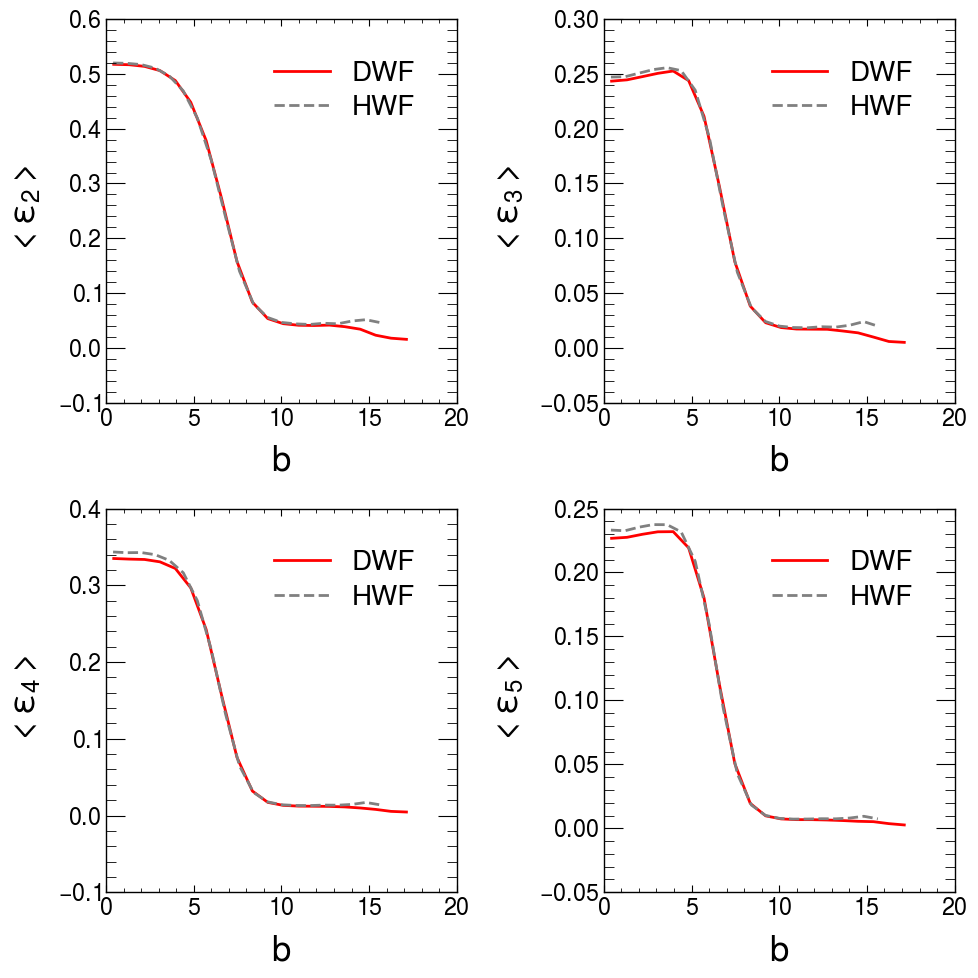

In [29]:
visualizer_without_errorbar.plot_multiple_relationships(cols_x=[1, 1, 1, 1], cols_y=[5, 6, 7, 8], bins=20,save_fig=True)

Figure saved to /home/mengzhu/mywork/d_Au_work/fig/rm <epsilon_n>_vs_rm Total quad Entropy.pdf


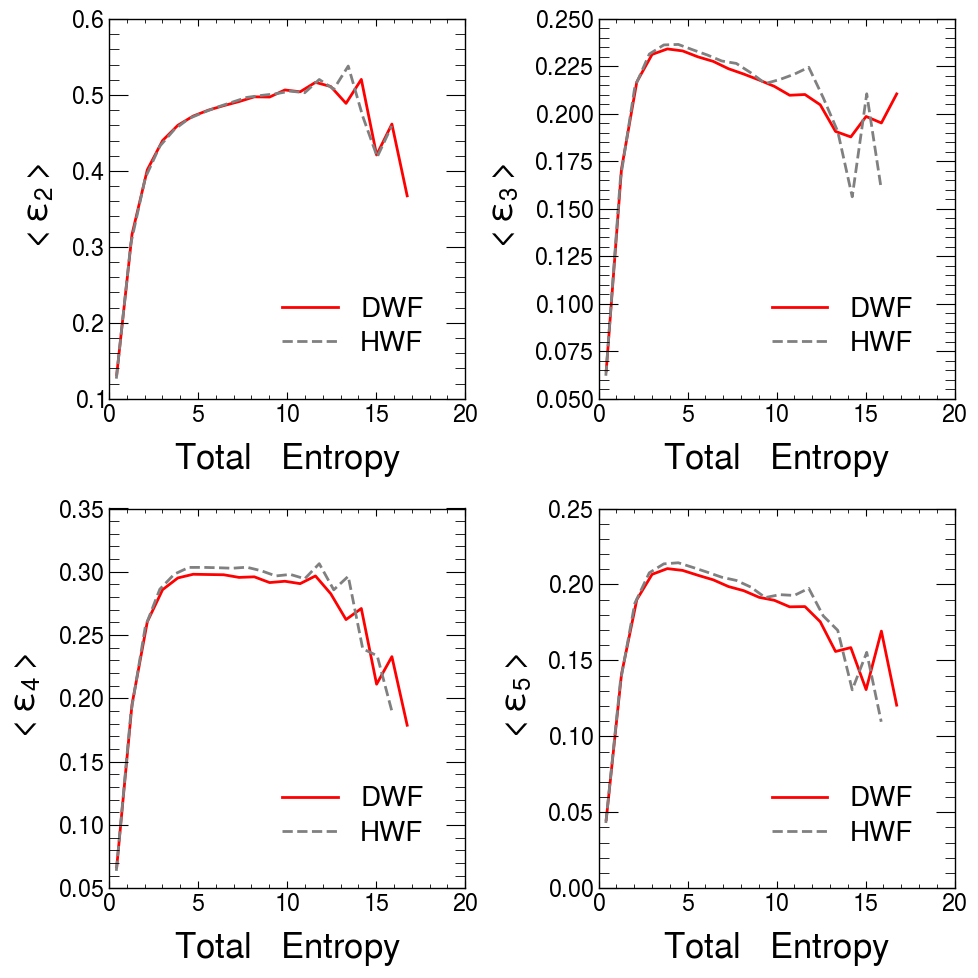

In [30]:
visualizer_without_errorbar.plot_multiple_relationships(cols_x=[4, 4, 4, 4], cols_y=[5, 6, 7, 8], bins=20,save_fig=True)

Figure saved to /home/mengzhu/mywork/d_Au_work/fig/rm <epsilon_n^2>_vs_rm Total quad Entropy.pdf


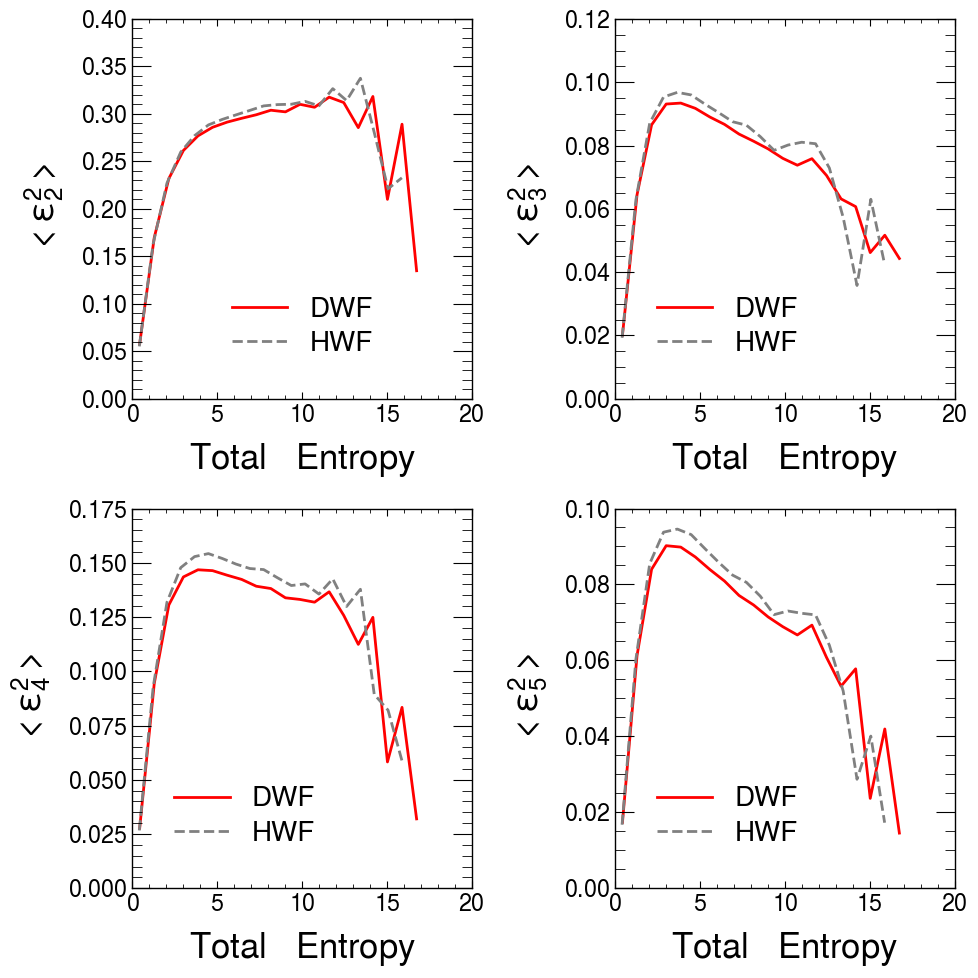

In [18]:
visualizer_without_errorbar.plot_multiple_relationships_sqr(cols_x=[4, 4, 4, 4], cols_y=[5, 6, 7, 8], bins=20,save_fig=True)

Figure saved to /home/mengzhu/mywork/d_Au_work/fig/rm sqrt{<epsilon_n^2>}_vs_rm Total quad Entropy.pdf


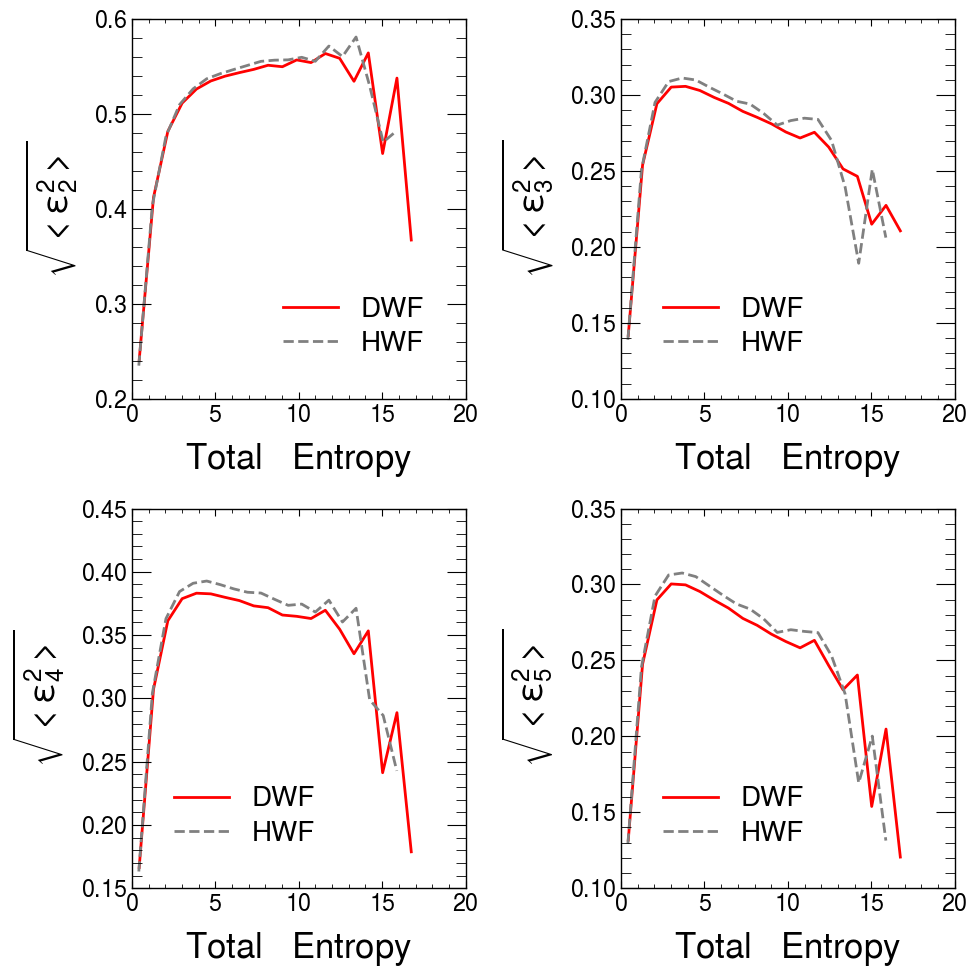

In [19]:
visualizer_without_errorbar.plot_multiple_relationships_sqr_sqrt(cols_x=[4, 4, 4, 4], cols_y=[5, 6, 7, 8], bins=20,save_fig=True)

Figure saved to /home/mengzhu/mywork/d_Au_work/fig/rm sqrt{<epsilon_n^2>-<epsilon_n>^2}_vs_rm Total quad Entropy.pdf


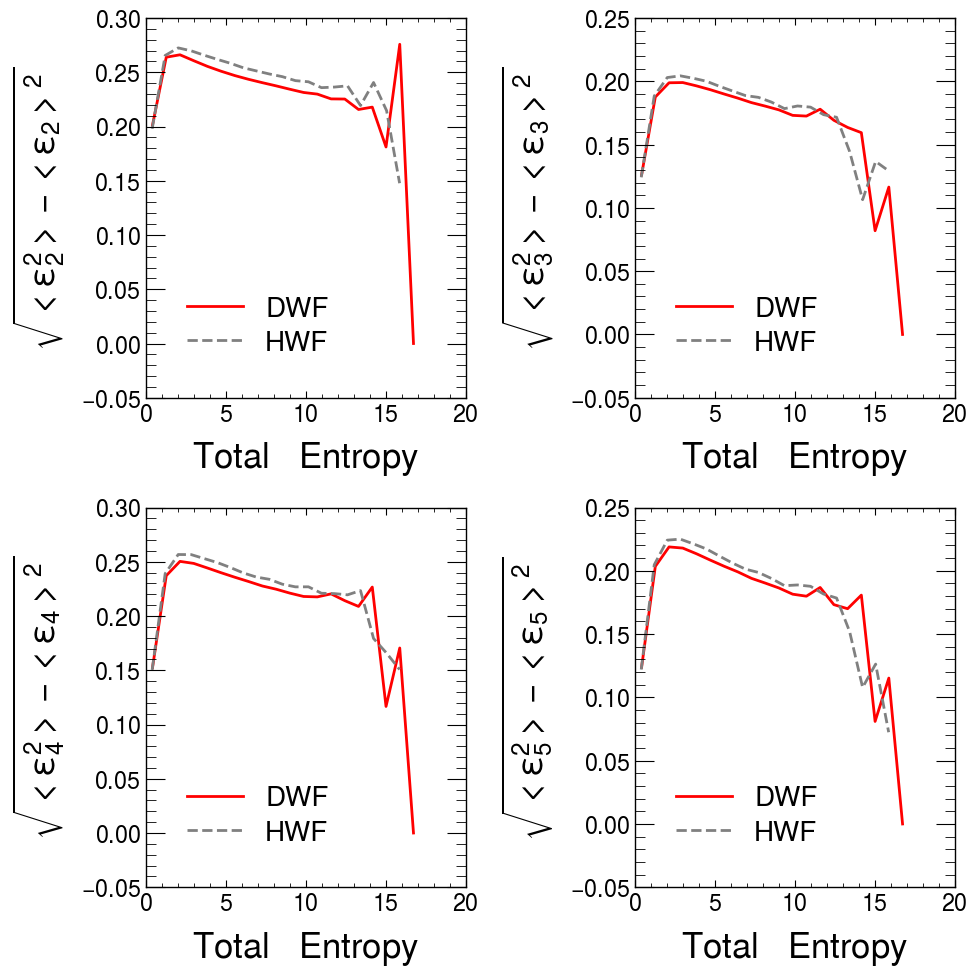

In [20]:
visualizer_without_errorbar.plot_multiple_relationships_delta(cols_x=[4, 4, 4, 4], cols_y=[5, 6, 7, 8], bins=20,save_fig=True)

Figure saved to /home/mengzhu/mywork/d_Au_work/fig/rm <epsilon_n^2>-<epsilon_n>^2_vs_rm Total quad Entropy.pdf


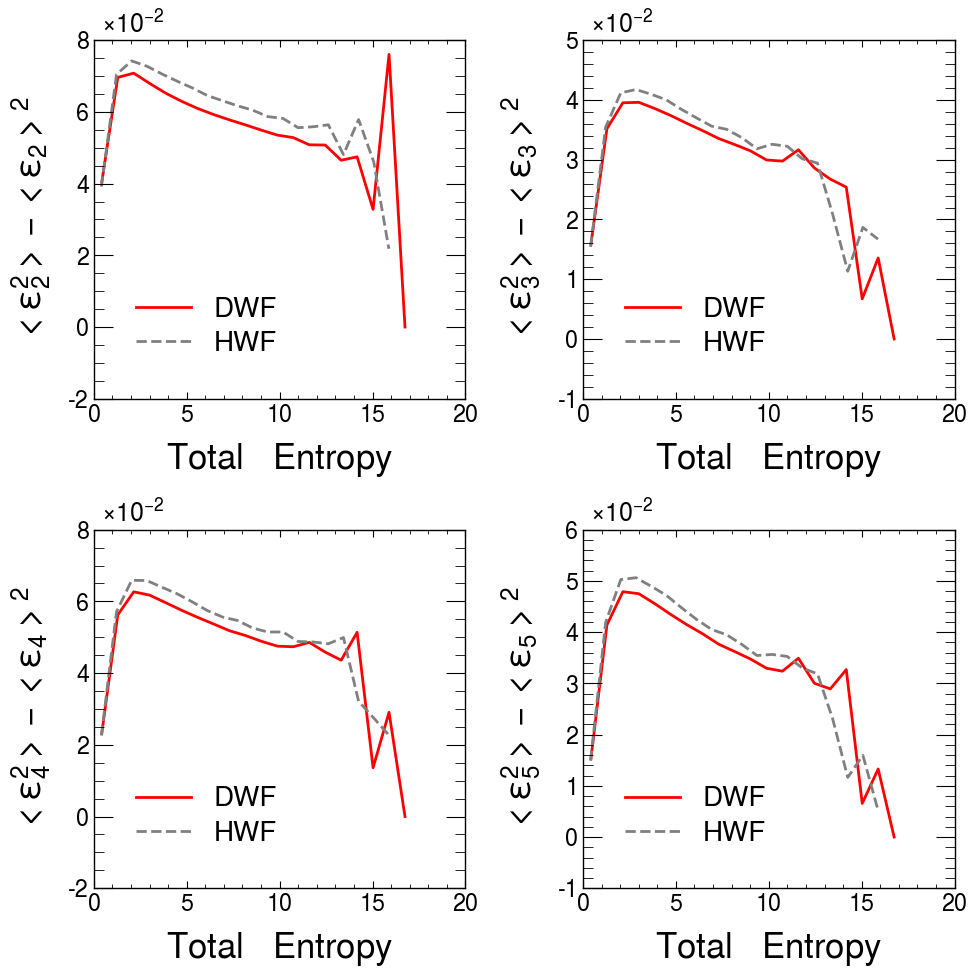

In [21]:
visualizer_without_errorbar.plot_multiple_relationships_delta2(cols_x=[4, 4, 4, 4], cols_y=[5, 6, 7, 8], bins=20,save_fig=True,loc="lower left")

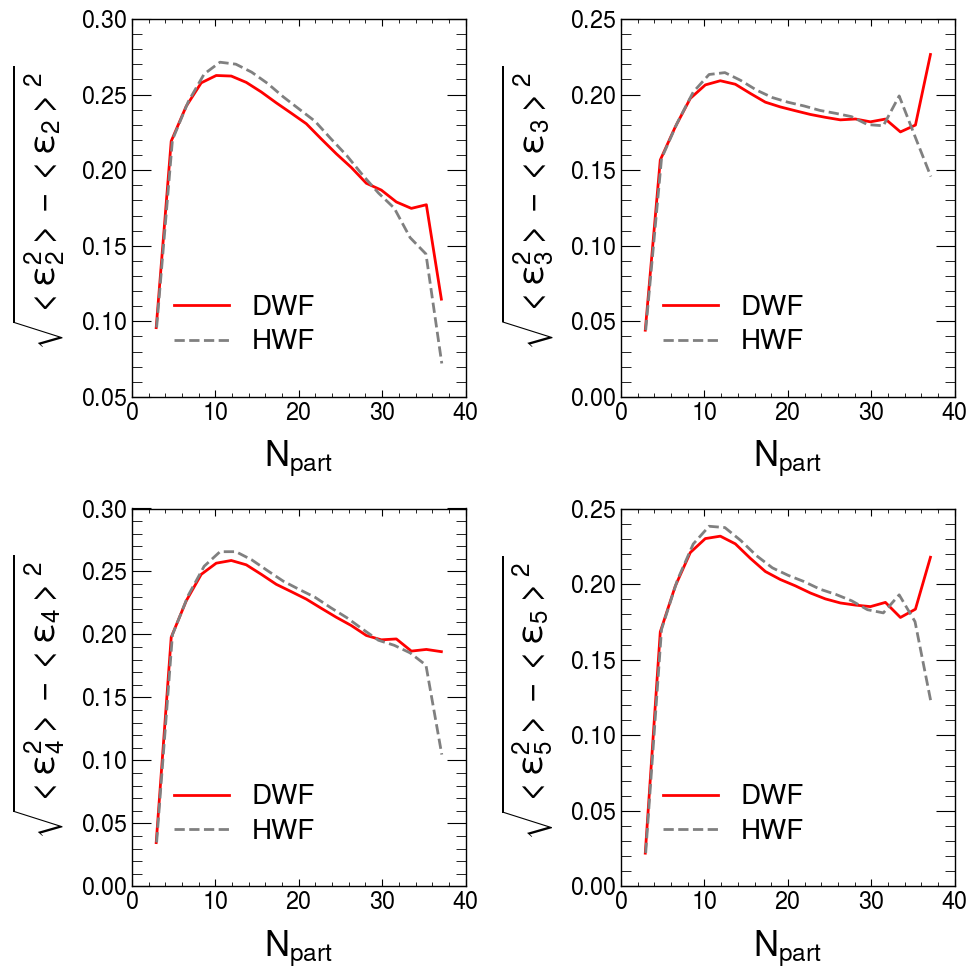

In [22]:
visualizer_without_errorbar.plot_multiple_relationships_delta(cols_x=[2, 2, 2, 2], cols_y=[5, 6, 7, 8], bins=20,loc="lower left")

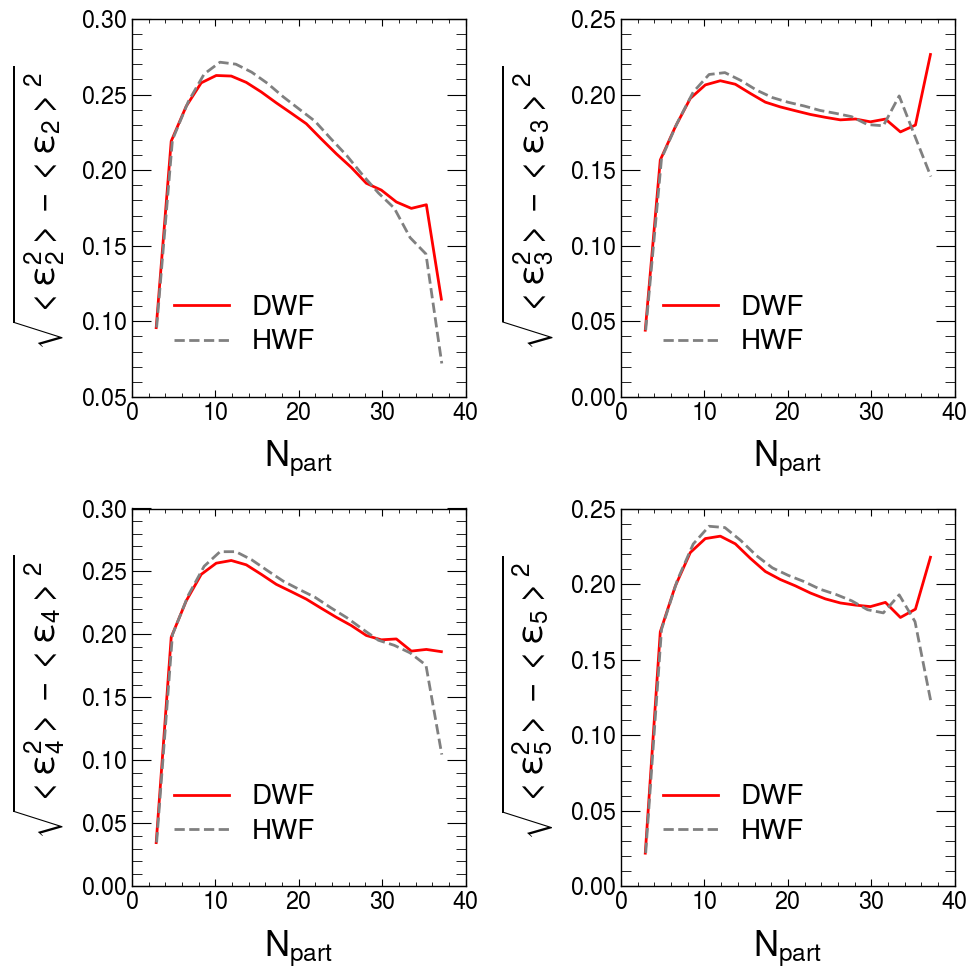

In [23]:
visualizer_without_errorbar.plot_multiple_relationships_delta(cols_x=[2, 2, 2, 2], cols_y=[5, 6, 7, 8], bins=20,loc="lower left")

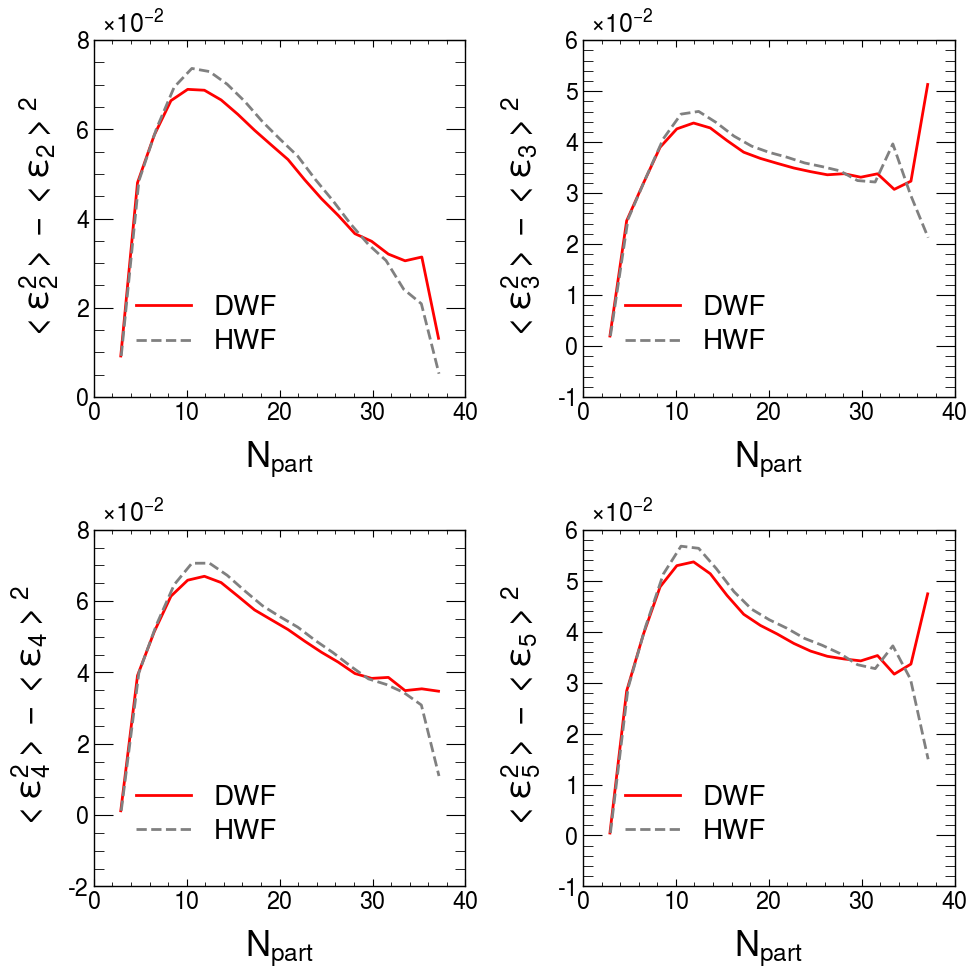

In [24]:
visualizer_without_errorbar.plot_multiple_relationships_delta2(cols_x=[2, 2, 2, 2], cols_y=[5, 6, 7, 8], bins=20,loc="lower left")

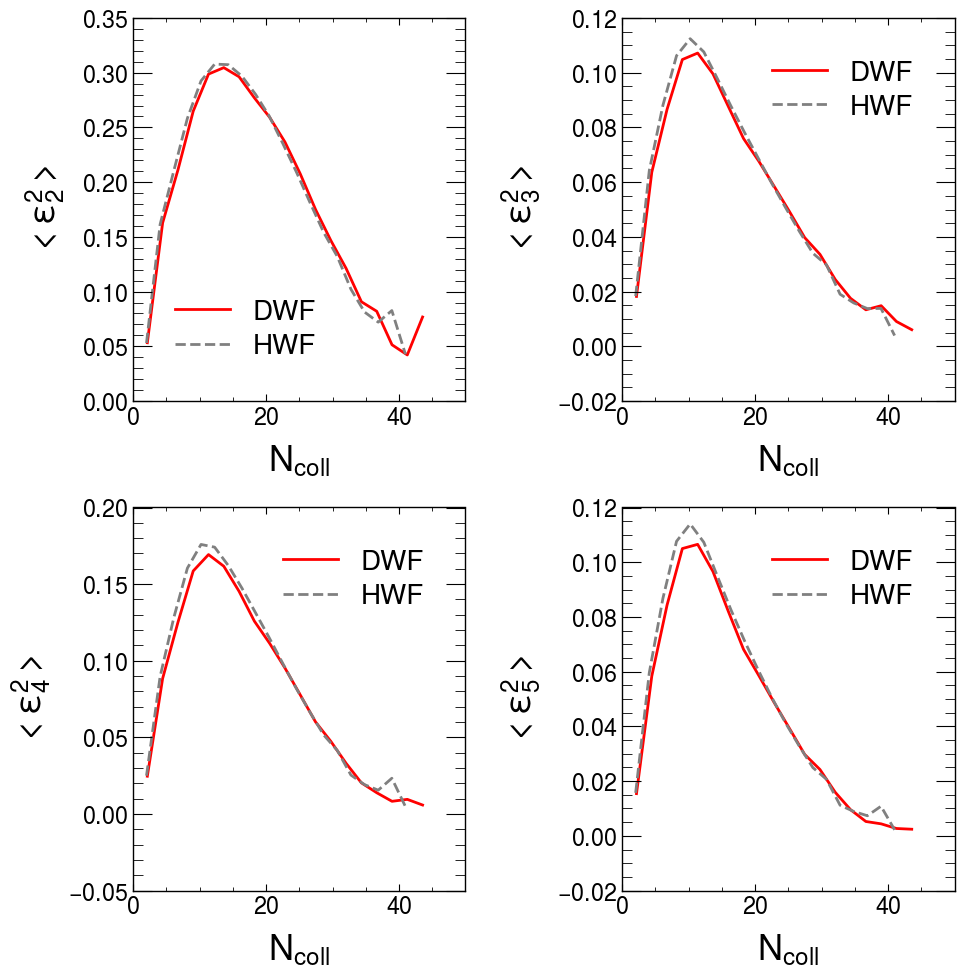

In [25]:
visualizer_without_errorbar.plot_multiple_relationships_sqr(cols_x=[3, 3, 3, 3], cols_y=[5, 6, 7, 8], bins=20)

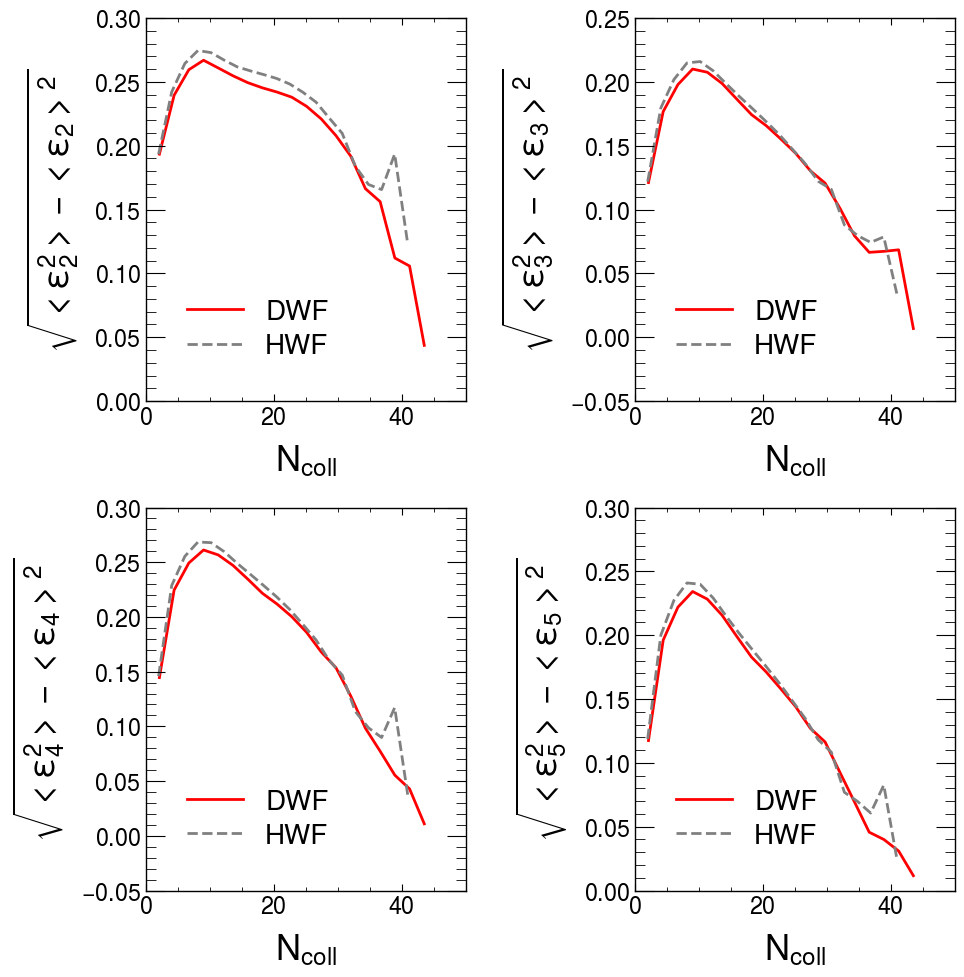

In [26]:
visualizer_without_errorbar.plot_multiple_relationships_delta(cols_x=[3, 3, 3, 3], cols_y=[5, 6, 7, 8], bins=20,loc="lower left")

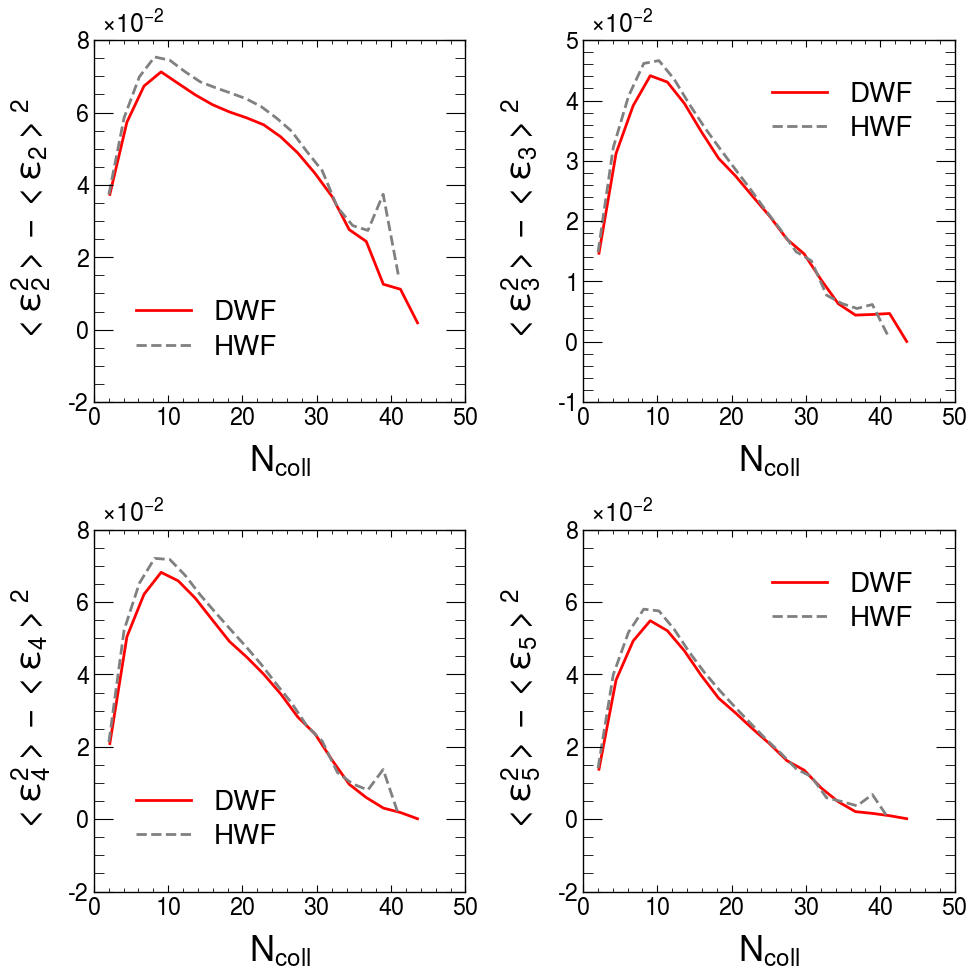

In [27]:
visualizer_without_errorbar.plot_multiple_relationships_delta2(cols_x=[3, 3, 3, 3], cols_y=[5, 6, 7, 8], bins=20)